In [1]:
import pandas as pd
import numpy as np
import stumpy
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file
file_path = "vietnam_housing_dataset.csv"
df = pd.read_csv(file_path)

# Kiểm tra dữ liệu
print(df.head())

# Chọn cột giá nhà để phân tích (loại bỏ giá trị NaN)
df = df[["Price"]].dropna()

# Chuyển thành mảng numpy để STUMPY xử lý
price_series = df["Price"].values


                                             Address  Area  Frontage  \
0  Dự án The Empire - Vinhomes Ocean Park 2, Xã L...  84.0       NaN   
1  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  60.0       NaN   
2  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  90.0       6.0   
3  Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...  54.0       NaN   
4   Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh  92.0       NaN   

   Access Road House direction Balcony direction  Floors  Bedrooms  Bathrooms  \
0          NaN             NaN               NaN     4.0       NaN        NaN   
1          NaN             NaN               NaN     5.0       NaN        NaN   
2         13.0      Đông - Bắc        Đông - Bắc     5.0       NaN        NaN   
3          3.5       Tây - Nam         Tây - Nam     2.0       2.0        3.0   
4          NaN      Đông - Nam        Đông - Nam     2.0       4.0        4.0   

       Legal status Furniture state  Price  
0  Have certificate             NaN

In [2]:
# Xác định độ dài cửa sổ (ví dụ: 50 dữ liệu liên tiếp)
window_size = 50  

# Tính toán ma trận khoảng cách
matrix_profile = stumpy.stump(price_series, m=window_size)

# Tìm vị trí của motif lặp lại
motif_idx = np.argmin(matrix_profile[:, 0])
print(f"Chu kỳ lặp lại được tìm thấy tại vị trí: {motif_idx}")


Chu kỳ lặp lại được tìm thấy tại vị trí: 17630


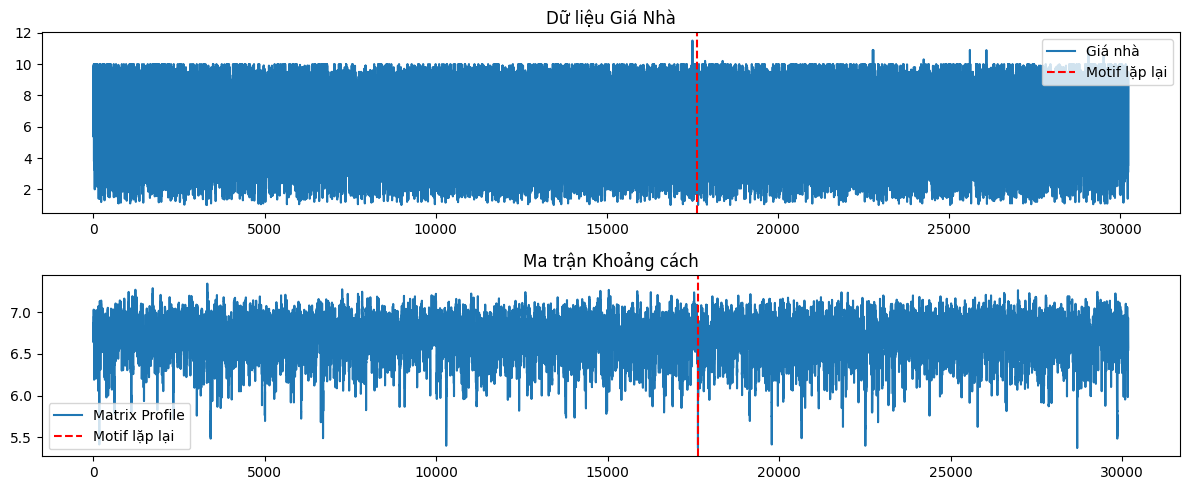

In [3]:
plt.figure(figsize=(12, 5))

# Vẽ giá nhà theo thứ tự
plt.subplot(2, 1, 1)
plt.plot(price_series, label="Giá nhà")
plt.axvline(motif_idx, color="r", linestyle="--", label="Motif lặp lại")
plt.title("Dữ liệu Giá Nhà")
plt.legend()

# Vẽ ma trận khoảng cách
plt.subplot(2, 1, 2)
plt.plot(matrix_profile[:, 0], label="Matrix Profile")
plt.axvline(motif_idx, color="r", linestyle="--", label="Motif lặp lại")
plt.title("Ma trận Khoảng cách")
plt.legend()

plt.tight_layout()
plt.show()
